# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Overview</a></div><div class="lev2 toc-item"><a href="#Scope" data-toc-modified-id="Scope-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Scope</a></div><div class="lev2 toc-item"><a href="#Needed-Libraries" data-toc-modified-id="Needed-Libraries-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Needed Libraries</a></div><div class="lev2 toc-item"><a href="#Features" data-toc-modified-id="Features-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Features</a></div><div class="lev1 toc-item"><a href="#Understanding-the-Dataset" data-toc-modified-id="Understanding-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding the Dataset</a></div><div class="lev2 toc-item"><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Exploration</a></div><div class="lev2 toc-item"><a href="#Outlier-Investigation" data-toc-modified-id="Outlier-Investigation-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outlier Investigation</a></div><div class="lev1 toc-item"><a href="#Optimize-Feature-Selection/Engineering" data-toc-modified-id="Optimize-Feature-Selection/Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Optimize Feature Selection/Engineering</a></div><div class="lev2 toc-item"><a href="#Create-new-features" data-toc-modified-id="Create-new-features-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create new features</a></div><div class="lev2 toc-item"><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature Selection</a></div><div class="lev2 toc-item"><a href="#Features-Scaling" data-toc-modified-id="Features-Scaling-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Features Scaling</a></div><div class="lev1 toc-item"><a href="#Algorithm-Selection-and-Tuning" data-toc-modified-id="Algorithm-Selection-and-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Algorithm Selection and Tuning</a></div><div class="lev2 toc-item"><a href="#Algorithm-Family-Selection" data-toc-modified-id="Algorithm-Family-Selection-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algorithm Family Selection</a></div><div class="lev2 toc-item"><a href="#Algorithm-Selection" data-toc-modified-id="Algorithm-Selection-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Algorithm Selection</a></div><div class="lev2 toc-item"><a href="#Algorithm-Tuning" data-toc-modified-id="Algorithm-Tuning-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Algorithm Tuning</a></div><div class="lev1 toc-item"><a href="#Project-Closure" data-toc-modified-id="Project-Closure-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Project Closure</a></div><div class="lev2 toc-item"><a href="#Dumping-files" data-toc-modified-id="Dumping-files-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dumping files</a></div><div class="lev1 toc-item"><a href="#Future-Improvements" data-toc-modified-id="Future-Improvements-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Future Improvements</a></div>

# Project Overview

## Scope

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives.  
These data have been combined with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.  

In this project, I am building **a person of interest identifier based on financial and email data**, made public as a result of the Enron scandal.  

The data have been combined in the form of a dictionary, where each key-value pair in the dictionary corresponds to one person. The dictionary key is the person's name, and the value is another dictionary, which contains the names of all the features and their values for that person.

## Needed Libraries

In [1]:
%matplotlib inline

import sys
sys.path.append("./code/")

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.svm import LinearSVC, SVC

from tester import test_classifier
import warnings

/home/yannis/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Features

The features included in the dataset can be divided in three categories, Salary Features, Stock Features and Email Features. Bellow you may find the full feature list with  brief definition of each one.

### Salary Features

| Payments            | Definitions of Category Groupings                                                                                                                                                                                                                                                                                                                                                                                                |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ***Salary***              | Reflects items such as base salary, executive cash allowances, and benefits payments.                                                                                                                                                                                                                                                                                                                                            |
| ***Bonus***               | Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.                                                                                                                                                                                                                                                                                                                  |
| ***Long Term Incentive*** | Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measuredagainst key performance drivers and business objectives over a multi-year period, generally 3 to 5 years.                                                                                                                                                            |
| ***Deferred Income***     | Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directorsunder a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.                                                                                                                     |
| ***Deferral Payments***   | Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.                                                                                                                                                                                                                                                                        |
| ***Loan Advances***       | Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of thepromissory notes allow for the option to repay with stock of the company.                                                                                                                                                                                       |
| ***Other***               | Reflects items such as payments for severence, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e.housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect toemployment agreements, as well as imputed income amounts for such things as use of corporate aircraft. |
| ***Expenses***            | Reflects reimbursements of business expenses. May include fees paid for consulting services.                                                                                                                                                                                                                                                                                                                                     |
| ***Director Fees***       | Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.                                                                                                                                                                                                                                                                                                                     |
| ***Total Payments***      | Sum of the above values                                                                                                                                                                                                                                                                                                                                                                                                         |
***

### Stock Features

| Stock Value              | Definitions of Category Groupings                                                                                                                                                                                                                                                                                                                                                       |
|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ***Exercised Stock Options***  | Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either throughcashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price andthe timing of any subsequent sale of the securities. |
| ***Restricted Stock***         | Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vestingperiods, regardless of whether deferred.                                                                                                                                                                             |
| ***Restricted StockDeferred*** | Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.                                                                                                                                                                                                                                                                     |
| ***Total Stock Value***        | Sum of the above values                                                                                                                                                                                                                                                                                                                                                                 |
***

### email features

| Variable                      | Definition                                                                    |
|-------------------------------|-------------------------------------------------------------------------------|
| ***to messages***             | Total number of emails received (person's inbox)                              |
| ***email address***           | Email address of the person                                                   |
| ***from poi to this person*** | Number of emails received by POIs                                             |
| ***from messages***           | Total number of emails sent by this person                                    |
| ***from this person to poi*** | Number of emails sent by this person to a POI.                                |
| ***shared receipt with poi*** | Number of emails addressed by someone else to a POI where this person was CC. |

# Understanding the Dataset

## Data Exploration

In [2]:
### Load the dictionary containing the dataset
with open("./dataset/final_project_dataset.pkl", "rb") as data_file:
    data_init = pickle.load(data_file)

#Converting the dataset from a python dictionary to a pandas dataframe
data_df = pd.DataFrame.from_dict(data_init, orient='index')
data_df.shape

(146, 21)

The dataset contains information of 21 features from 146 employees.  

In [3]:
data_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


There are some NaNs in the dataset. By paying attention to the [Payments Schedule](dataset/enron61702insiderpay.pdf) which is the source of the dataset, we can see that the empty values are actually "0" except the *email_address*.  
Also, the *email_address* field isn't an information we can somehow use during the analysis, it is better to remove this column.

In [4]:
data_df.replace(to_replace="NaN", value=0, inplace=True)
data_df = data_df.drop("email_address", axis=1)

Since some values are related I would like to rearrange the columns in he following form:  

| **POI** | *All payment features* | **Total Payments** | *All stock features* | **Total Stocks** | *Incoming emails features* | **All incoming mails** | *sent emails features* | **All sent emails** |

In [5]:
cols = [
    'poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income',
    'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees',
    'total_payments', 'exercised_stock_options', 'restricted_stock',
    'restricted_stock_deferred', 'total_stock_value',
    'from_poi_to_this_person', 'shared_receipt_with_poi', 'to_messages',
    'from_this_person_to_poi', 'from_messages'
]
data_df = data_df[cols]
data_df.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
ALLEN PHILLIP K,False,201955,4175000,304805,-3081055,2869717,0,152,13868,0,4484442,1729541,126027,-126027,1729541,47,1407,2902,65,2195
BADUM JAMES P,False,0,0,0,0,178980,0,0,3486,0,182466,257817,0,0,257817,0,0,0,0,0
BANNANTINE JAMES M,False,477,0,0,-5104,0,0,864523,56301,0,916197,4046157,1757552,-560222,5243487,39,465,566,0,29
BAXTER JOHN C,False,267102,1200000,1586055,-1386055,1295738,0,2660303,11200,0,5634343,6680544,3942714,0,10623258,0,0,0,0,0
BAY FRANKLIN R,False,239671,400000,0,-201641,260455,0,69,129142,0,827696,0,145796,-82782,63014,0,0,0,0,0


Now that the features are in the right order, we can examine the statistics of the dataset.

In [6]:
data_df.describe()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000
mean,3.658114e+05,1.333474e+06,6.646839e+05,-3.827622e+05,4.387965e+05,1.149658e+06,5.854318e+05,7.074827e+04,1.942249e+04,4.350622e+06,4.182736e+06,1.749257e+06,2.051637e+04,5.846018e+06,38.226027,692.986301,1221.589041,24.287671,358.602740
std,2.203575e+06,8.094029e+06,4.046072e+06,2.378250e+06,2.741325e+06,9.649342e+06,3.682345e+06,4.327163e+05,1.190543e+05,2.693448e+07,2.607040e+07,1.089995e+07,1.439661e+06,3.624681e+07,73.901124,1072.969492,2226.770637,79.278206,1441.259868
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.799289e+07,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,-4.409300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.394475e+04,0.000000e+00,8.115000e+03,0.000000e+00,2.288695e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.105960e+05,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.595000e+02,2.018200e+04,0.000000e+00,9.413595e+05,6.082935e+05,3.605280e+05,0.000000e+00,9.659550e+05,2.500000,102.500000,289.000000,0.000000,16.500000
75%,2.708505e+05,8.000000e+05,3.750648e+05,0.000000e+00,9.684500e+03,0.000000e+00,1.506065e+05,5.374075e+04,0.000000e+00,1.968287e+06,1.714221e+06,8.145280e+05,0.000000e+00,2.319991e+06,40.750000,893.500000,1585.750000,13.750000,51.250000
max,2.670423e+07,9.734362e+07,4.852193e+07,0.000000e+00,3.208340e+07,8.392500e+07,4.266759e+07,5.235198e+06,1.398517e+06,3.098866e+08,3.117640e+08,1.303223e+08,1.545629e+07,4.345095e+08,528.000000,5521.000000,15149.000000,609.000000,14368.000000


We can see that the 3 categories have different orders of magnitude with the biggest different between the *email features* with the other two categories.  

Also let's find out how many POIs we have in the dataset.

In [7]:
data_df.loc[:, "poi"].value_counts()

False    128
True      18
Name: poi, dtype: int64

## Outlier Investigation

My first attempt to spot any possible outliers will be visual.  
I will use Seaborn's pairplot which present in the same time the distribution of the variables and a scatter plot representation of them. Since the number of variables are too many to plot them all, I will use the 4 with the higher variance.

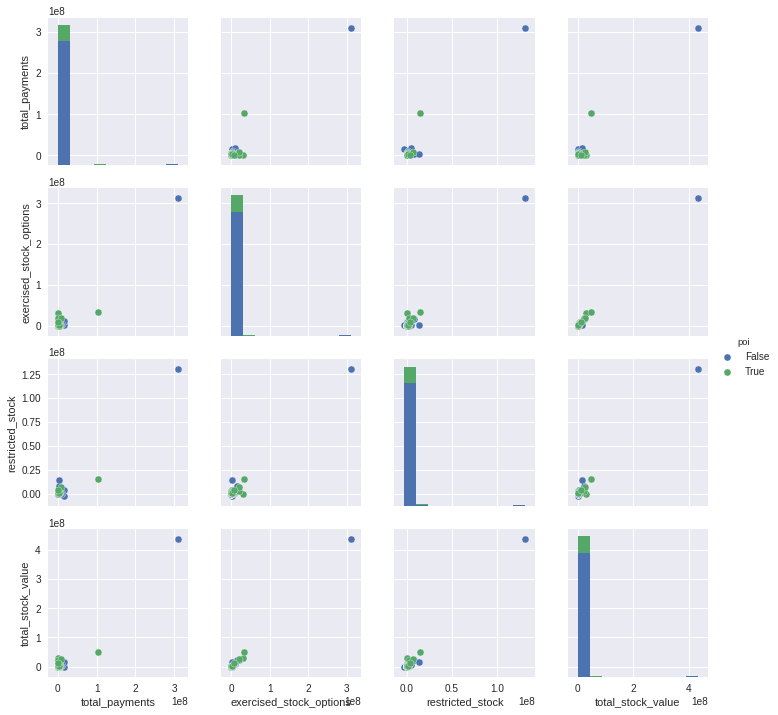

In [8]:
sns.pairplot(data=data_df, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")

There are two datapoints far away from the cluster of the rest. I will use the *Total Payments* to find them.

In [9]:
data_df.total_payments.nlargest(2)

TOTAL            309886585
LAY KENNETH L    103559793
Name: total_payments, dtype: int64

The first one 'TOTAL', is the totals on the [Payments Schedule](dataset/enron61702insiderpay.pdf) and not a person so it should be removed.  
The second one is not an outlier, it is just the huge payment and stock value of the CEO and chairman of Enron, Kenneth Lay. Datapoints like this are not outliers; in fact anomalies like this may lead us to the rest of the POIs. 
These extreme values lead the rest of the employees to the bottom left corner of the scatterplot. Let's use a logarithmic scale for both axes to unclutter the plot.

In [10]:
data_df.drop("TOTAL", inplace=True)

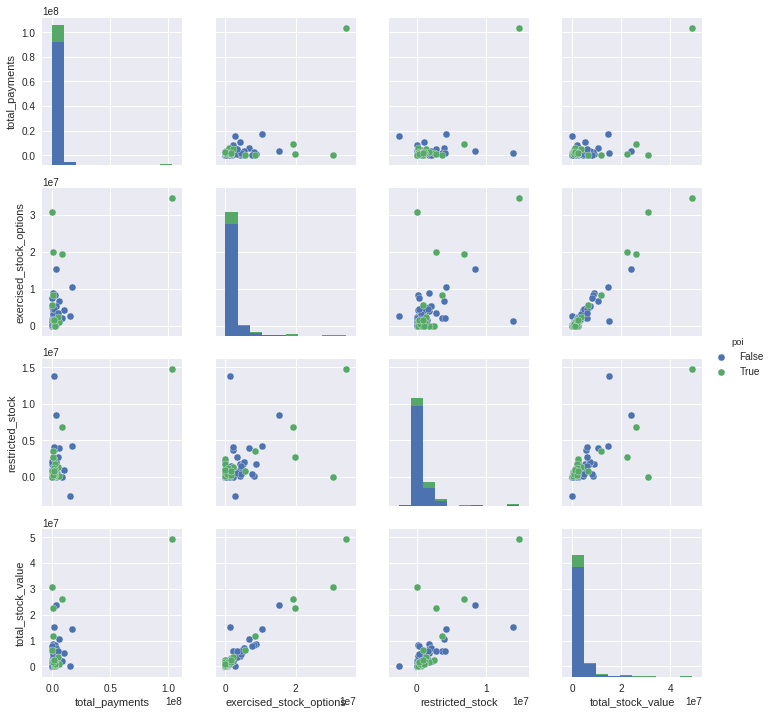

In [11]:
sns.pairplot(data=data_df, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")

With the "TOTAL" removed the scatter plots are much more uncluttered and we can see some trends on them.  
We can notice also a negative value on *Restricted Stock* variable, an indication that more outliers may exist.  
Since the data have been taken from a financial statement an error may have introduced during the data entry / scrapping.  
We can make a first sanity by checking if the individual values sum with the totals of each category (*Total Payments*, *Total Stock Value*).

In [12]:
print(data_df.sum()[1:11])
print("---")
print("Sum all 'payment' variables:", sum(data_df.sum()[1:10]))

salary                  26704229.0
bonus                   97343619.0
long_term_incentive     48521928.0
deferred_income        -27890391.0
deferral_payments       31980896.0
loan_advances           83925000.0
other                   42805453.0
expenses                 5094049.0
director_fees            1437166.0
total_payments         325304226.0
dtype: float64
---
Sum all 'payment' variables: 309921949.0


In [13]:
print(data_df.sum()[11:15])
print("---")
print("Sum all 'stock' variables:", sum(data_df.sum()[11:14]))

exercised_stock_options      298915485.0
restricted_stock             125069226.0
restricted_stock_deferred     10572178.0
total_stock_value            419009128.0
dtype: float64
---
Sum all 'stock' variables: 434556889.0


We can see that the totals do not match. I need to check employee by employee to find the errors.

In [14]:
alist = []
for line in data_df.itertuples():
    if sum(line[2:11]) != line[11] or sum(line[12:15]) != line[15]:
        alist.append(line[0])
data_df.loc[alist]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
BELFER ROBERT,False,0,0,0,0,-102500,0,0,0,3285,102500,3285,0,44093,-44093,0,0,0,0,0
BHATNAGAR SANJAY,False,0,0,0,0,0,0,137864,0,137864,15456290,2604490,-2604490,15456290,0,0,463,523,1,29


Comparing the above results with the [Payments Schedule](dataset/enron61702insiderpay.pdf) we can see that there are some errors in the data.  
The right values are:

|               | poi | salary | deferral_payments | loan_advances | bonus | deferred_income | expenses | other | long_term_incentive | director_fees | total_payments | restricted_stock_deferred | exercised_stock_options | restricted_stock | total_stock_value |
|-------------------|--------|-------------------|---------------|-------|-----------------|----------|-------|---------------------|---------------|----------------|---------------------------|-------------------------|------------------|-------------------|
| **BELFER ROBERT** | False | 0      | 0                 | 0             | 0     | -102500        | 3285    | 0     | 0                   | 102500       | 3285          | -44093                   | 0                       | 44093           | 0                 |
| **BHATNAGAR SANJAY** | False | 0      | 0                 | 0             | 0     | 0               | 137864  |   0    | 0                   | 0             | 137864        | -2604490                | 15456290              | 2604490        | 15456290        |


In [15]:
data_df.loc["BELFER ROBERT", :] = [
    False, 0, 0, 0, 0, -102500, 3285, 0, 0, 102500, 3285, -44093, 0, 44093, 0,
    0, 0, 0, 0, 0
]
data_df.loc["BHATNAGAR SANJAY", :] = [
    False, 0, 0, 0, 0, 0, 137864, 0, 0, 0, 137864, -2604490, 15456290, 2604490,
    15456290, 0, 463, 523, 1, 29
]

Now that we do not have any more outliers we can plot the two aggregated variables, *Total Payments* and *Total Stock Value*.

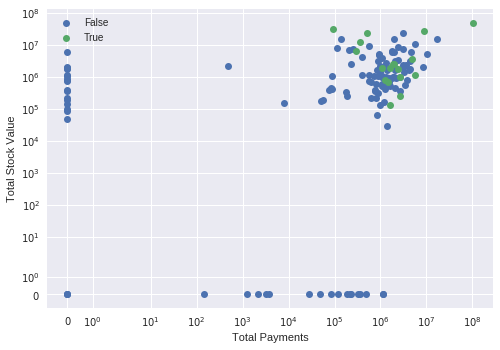

In [16]:
fig1, ax = plt.subplots()
for poi, data in data_df.groupby(by="poi"):
    ax.plot(data['total_payments'],data['total_stock_value'],'o', label=poi)
ax.legend()
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")

plt.show()

We can see that there are some persons with zero salary or bonus (or both) and none of them is a POI. Since we have a sparse number of POIs it might be beneficial to remove them to have a more dense dataset. I will create a copy of the dataset with the specific persons removed for further evaluation.

In [17]:
data_nbs = data_df[data_df.salary > 0]
data_nbs = data_nbs[data_nbs.bonus > 0]
data_nbs.shape

(81, 20)

Now that the dataset is clear of outliers we can split the labels from the features and have a first scoring as a baseline for the rest of the analysis. I will use the LinearSVC classifier which seems the more appropriate to begin.  
The dataset is quite sparse to use the usual *training*/*testing* splitting so instead I will use the whole dataset for training and cross validation for testing. The procedure has been code in the ```test_classifier()``` function, part of the *tester.py* file.

In [18]:
def do_split(data):
    X = data.copy()
    #Removing the poi labels and put them in a separate array, transforming it
    #from True / False to 0 / 1
    y = X.pop("poi").astype(int)
    
    return X, y, 

In [19]:
X, y = do_split(data_nbs)

In [20]:
#test_classifier() demands the dataset in a dictionary and the features labels
#in a list with 'poi' first.
features = data_df.columns.tolist()
data = data_df.to_dict(orient='index')

test_classifier(LinearSVC(random_state=42), data, features)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)
	Accuracy: 0.74307	Precision: 0.21031	Recall: 0.33650	F1: 0.25885	F2: 0.30045
	Total predictions: 15000	True positives:  673	False positives: 2527	False negatives: 1327	True negatives: 10473



We are interested in the ability of the classifier not to label as Person Of Interest (POI) a person that is not, and also to find all the POIs so the metrics that we are most interested are **Precision** and **Recall**. Since we want to maximize both in the same time we will try to maximize the **F1** score which can be interpreted as a weighted average of the precision and recall.  
We can see that the initial scores are very low with the LinearSVC classifier being poor in classifying the right persons. This result might be either due to inability of the specific algorithm to make a good prediction on the specific dataset or because of the need of preprocessing of the dataset (or both).  
In the following steps, I will explore the impact of adding and transforming features to the performance of the model. Finally, I will try several algorithm families to end up with a combination of features / algorithm to build the best performing model for the specific problem.

# Optimize Feature Selection/Engineering

## Create new features

In some cases the value of a variable is less important than its proportion to an aggregated value. As an example from the current dataset a bonus of 100,000 is less informative than a bonus 3 times the salary, or "500 sent email to POIs" is far less informative than "half of the sent emails have been sent to POIs".  
For this reason I will add the proportions of each variable to its category's sum.

In [21]:
data = data_df.copy()
data.loc[:, "salary_p"] = data.loc[:, "salary"]/data.loc[:, "total_payments"]
data.loc[:, "deferral_payments_p"] = data.loc[:, "deferral_payments"]/data.loc[:, "total_payments"]
data.loc[:, "loan_advances_p"] = data.loc[:, "loan_advances"]/data.loc[:, "total_payments"]
data.loc[:, "bonus_p"] = data.loc[:, "bonus"]/data.loc[:, "total_payments"]
data.loc[:, "deferred_income_p"] = data.loc[:, "deferred_income"]/data.loc[:, "total_payments"]
data.loc[:, "expenses_p"] = data.loc[:, "expenses"]/data.loc[:, "total_payments"]
data.loc[:, "other_p"] = data.loc[:, "other"]/data.loc[:, "total_payments"]
data.loc[:, "long_term_incentive_p"] = data.loc[:, "long_term_incentive"]/data.loc[:, "total_payments"]
data.loc[:, "director_fees_p"] = data.loc[:, "director_fees"]/data.loc[:, "total_payments"]

data.loc[:, "restricted_stock_deferred_p"] = data.loc[:, "restricted_stock_deferred"]/data.loc[:, "total_stock_value"]
data.loc[:, "exercised_stock_options_p"] = data.loc[:, "exercised_stock_options"]/data.loc[:, "total_stock_value"]
data.loc[:, "restricted_stock_p"] = data.loc[:, "restricted_stock"]/data.loc[:, "total_stock_value"]

data.loc[:, "from_poi_to_this_person_p"] = data.loc[:, "from_poi_to_this_person"]/data.loc[:, "to_messages"]
data.loc[:, "shared_receipt_with_poi_p"] = data.loc[:, "shared_receipt_with_poi"]/data.loc[:, "to_messages"]

data.loc[:, "from_this_person_to_poi_p"] = data.loc[:, "from_this_person_to_poi"]/data.loc[:, "from_messages"]
    
data.replace(to_replace=np.NaN, value=0, inplace=True)
data.replace(to_replace=np.inf, value=0, inplace=True)
data.replace(to_replace=-np.inf, value=0, inplace=True)

Now we can plot the importance of the features of the "enriched" dataset by using the same classifier.

In [22]:
def plot_importance(dataset):
    X, y = do_split(dataset)

    selector = SelectPercentile(percentile=100)
    a = selector.fit(X, y)

    plt.figure(figsize=(12,9))
    sns.barplot(y=X.columns, x=a.scores_)

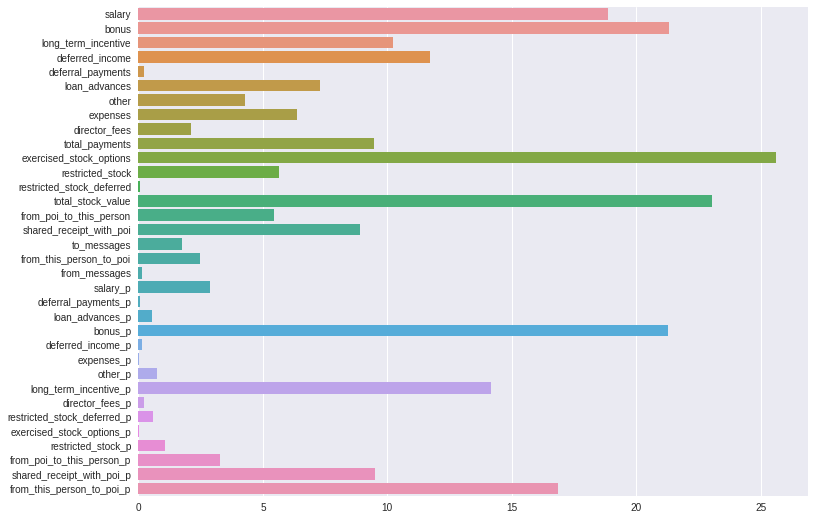

In [23]:
plot_importance(data)

Comparing the newly created features with the original we can see that the proportions of "Long Term Incentive", "Restricted Stock Deferred" and "From This Person to POI" score higher than the original features. We will keep these and remove the original values. to avoid bias the model towards a specific feature by using both the original value and its proportion.

In [24]:
#Adding the proportions
data_df.loc[:, "long_term_incentive_p"] = data_df.loc[:, "long_term_incentive"]/data_df.loc[:, "total_payments"]
data_df.loc[:, "restricted_stock_deferred_p"] = data_df.loc[:, "restricted_stock_deferred"]/data_df.loc[:, "total_stock_value"]
data_df.loc[:, "from_this_person_to_poi_p"] = data_df.loc[:, "from_this_person_to_poi"]/data_df.loc[:, "from_messages"]
#Removing the original values.
data_df.drop("long_term_incentive", axis=1)
data_df.drop("restricted_stock_deferred", axis=1)
data_df.drop("from_this_person_to_poi", axis=1)
#Correcting NaN and infinity values created by zero divisions
data_df.replace(to_replace=np.NaN, value=0, inplace=True)
data_df.replace(to_replace=np.inf, value=0, inplace=True)
data_df.replace(to_replace=-np.inf, value=0, inplace=True)

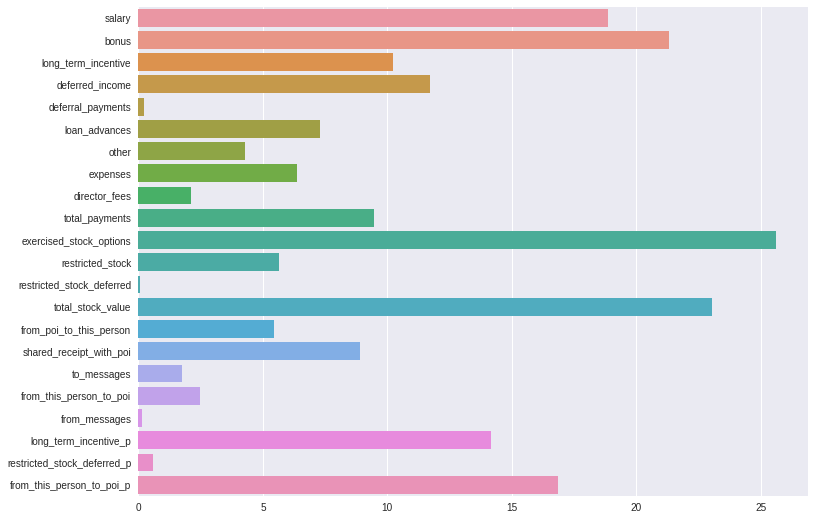

In [25]:
plot_importance(data_df)

## Feature Selection

For feature selection I will use LinearSVC classifier and I will test both univariate feature selection (KBest) and Primary Component Analysis.

In [26]:
X, y = do_split(data_df)

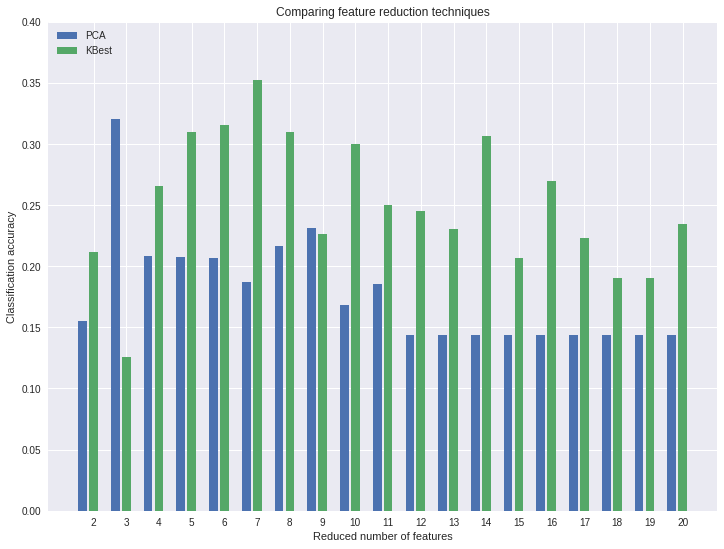

Pipeline(steps=[('reduce_dim', SelectKBest(k=7, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])

In [27]:
warnings.filterwarnings('ignore')

pipe = Pipeline([('reduce_dim', PCA(random_state=42)),
                 ('classify', LinearSVC(random_state=42))])

N_FEATURES_OPTIONS = list(range(2,21))

param_grid = [
    {
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
    },
]
reducer_labels = ['PCA', 'KBest']
cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

X, y = do_split(data_df)
grid.fit(X, y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(-1, len(N_FEATURES_OPTIONS))
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)
plt.figure(figsize=(12,9))

for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label)

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0, 0.4))
plt.legend(loc='upper left')

plt.show()
grid.best_estimator_

We can see that we get the best result if we reduce the features of the model to :

In [28]:
selector = SelectKBest(k=6)
selector.fit(X, y)
X.columns[selector.get_support()].tolist()

['salary',
 'bonus',
 'exercised_stock_options',
 'total_stock_value',
 'long_term_incentive_p',
 'from_this_person_to_poi_p']

The score of LinearSVC on the reduced dataset is:

In [29]:
features = data_df.columns.tolist()
data_dict = data_df.to_dict(orient='index')
test_classifier(grid.best_estimator_, data_dict, features)

Pipeline(steps=[('reduce_dim', SelectKBest(k=7, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])
	Accuracy: 0.76007	Precision: 0.24481	Recall: 0.38350	F1: 0.29885	F2: 0.34447
	Total predictions: 15000	True positives:  767	False positives: 2366	False negatives: 1233	True negatives: 10634



There is a 17% improvement on the f1 score with 20% better precision and 12% better recall.

## Features Scaling

There are features in the dataset with big differences in scaling. For example *salary* appears with values between 0 and 2.5 millions while *from_this_person_to_poi_p* takes values in the range [0,1). Some of the algorithms we will evaluate may behave badly because of these differences so we need to scale them.  

Having sparse data it is better to use ```MaxAbsScaler()``` for this transformation.

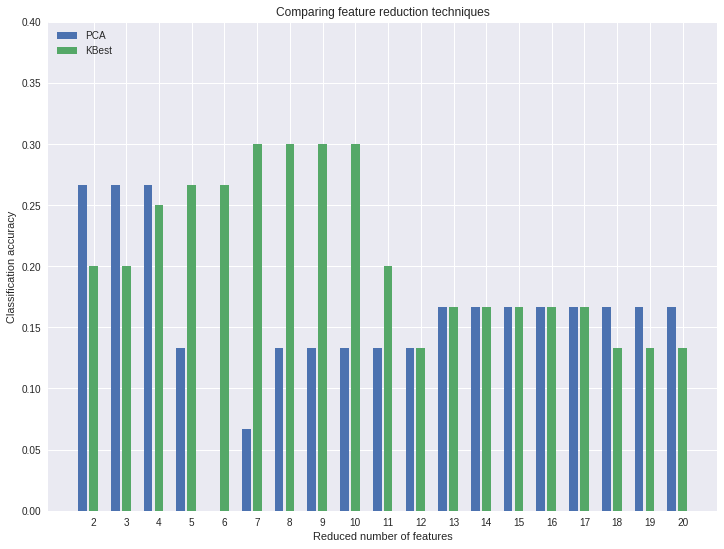

Pipeline(steps=[('scale', MaxAbsScaler(copy=True)), ('reduce_dim', SelectKBest(k=7, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])

In [30]:
#warnings.filterwarnings('ignore')

pipe = Pipeline([('scale', MaxAbsScaler()),
                 ('reduce_dim', PCA(random_state=42)),
                 ('classify', LinearSVC(random_state=42))])

N_FEATURES_OPTIONS = list(range(2, 21))

param_grid = [
    {
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
    },
]
reducer_labels = ['PCA', 'KBest']
cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

grid.fit(X, y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(-1, len(N_FEATURES_OPTIONS))
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)
plt.figure(figsize=(12,9))

for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label)

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0, 0.4))
plt.legend(loc='upper left')

plt.show()
grid.best_estimator_

In [31]:
features = data_df.columns.tolist()
data = data_df.to_dict(orient='index')
test_classifier(grid.best_estimator_, data, features)

Pipeline(steps=[('scale', MaxAbsScaler(copy=True)), ('reduce_dim', SelectKBest(k=7, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])
	Accuracy: 0.87140	Precision: 0.55868	Recall: 0.16900	F1: 0.25950	F2: 0.19640
	Total predictions: 15000	True positives:  338	False positives:  267	False negatives: 1662	True negatives: 12733



This is a quite interesting result. After scaling, model's Precision doubled but Recall fell lower than half, giving the model lower f1 score than before. I'll edit the pipeline to add the option of no-scaling and also the StandardScaler which is a more frequently used option but not very good for sparse data.

In [32]:
pipe = Pipeline([('scale', MaxAbsScaler()),
                 ('reduce_dim', PCA(random_state=42)),
                 ('classify', LinearSVC(random_state=42))])

N_FEATURES_OPTIONS = list(range(2, 21))

param_grid = [
    {
        'scale':[None, MaxAbsScaler(), StandardScaler()],
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'scale':[None, MaxAbsScaler(), StandardScaler()],
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
    },
]
reducer_labels = ['PCA', 'KBest']
cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

grid.fit(X, y)
grid.best_estimator_

Pipeline(steps=[('scale', None), ('reduce_dim', SelectKBest(k=7, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])

It's now clear that LinearSVC performs better without scaling but I will keep the scaling options in the pipeline because other algorithms may have different behaviour.

# Algorithm Selection and Tuning

Having finished with the preprocessing of the dataset I will begin evaluating the performance of suitable algorithms. First I will evaluate different algorithms' families by using their most usual member with some generalized attributes and once I conclude with the family I will evaluate different members.

## Algorithm Family Selection

### Support Vector Machine

From Support Vector Machines, I will evaluate Support Vector Classifier with the default kernel (RBF) and Penalty Parameters 0.1, 1, 10

In [33]:
#warnings.filterwarnings('ignore')

pipe = Pipeline([('scale', MaxAbsScaler()),
                 ('reduce_dim', PCA(random_state=42)),
                 ('classify', SVC(random_state=42))])

N_FEATURES_OPTIONS = list(range(2, 10))
C_VALUES = [0.1, 1, 10]


param_grid = [
    {
        'scale':[None, MaxAbsScaler()],
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_VALUES
    },
    {
        'scale':[None, MaxAbsScaler()],
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_VALUES
    },
]

cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

grid.fit(X, y)

print(grid.best_estimator_)

Pipeline(steps=[('scale', MaxAbsScaler(copy=True)), ('reduce_dim', SelectKBest(k=3, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])


In [34]:
test_classifier(grid.best_estimator_, data, features)

Pipeline(steps=[('scale', MaxAbsScaler(copy=True)), ('reduce_dim', SelectKBest(k=3, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.86927	Precision: 0.88235	Recall: 0.02250	F1: 0.04388	F2: 0.02795
	Total predictions: 15000	True positives:   45	False positives:    6	False negatives: 1955	True negatives: 12994



Support Vector Machines gave as the highest Precision so far but in the same time the worst Recall achieving an F1 score of 0.05405

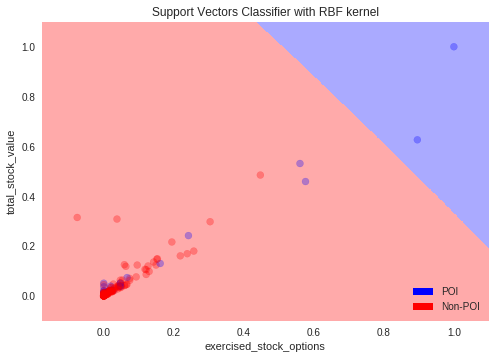

In [35]:
h = .001  #step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

scale = MaxAbsScaler()
X_trans = scale.fit_transform(X)
select = SelectKBest(k=2)
X_trans = select.fit_transform(X_trans, y)
y_trans = y.values

clf = SVC(C=1,
          cache_size=200,
          class_weight=None,
          coef0=0.0,
          decision_function_shape=None,
          degree=3,
          gamma='auto',
          kernel='rbf',
          max_iter=-1,
          probability=False,
          random_state=42,
          shrinking=True,
          tol=0.001,
          verbose=False)
clf.fit(X_trans, y_trans)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_trans[:, 0].min() - 0.1, X_trans[:, 0].max() + 0.1
y_min, y_max = X_trans[:, 1].min() - 0.1, X_trans[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, cmap=cmap_bold, alpha=0.3)

# Legend Data
classes = ['POI','Non-POI']
class_colours = ['#0000FF', '#FF0000']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))

# Plot Legend ('loc' == position):
plt.legend(recs,classes,loc=4)
plt.title("Support Vectors Classifier with RBF kernel")
plt.xlabel(X.columns[select.get_support()][0])
plt.ylabel(X.columns[select.get_support()][1])

plt.show()

### Nearest Neighbors

From the Nearest Neighbors family, I will evaluate *KNeighborsClassifier*. Since this algorithm is very fast, I'm able to evaluate several parameters.

In [36]:
#warnings.filterwarnings('ignore')

pipe = Pipeline([('scale', MaxAbsScaler()),
                 ('reduce_dim', PCA(random_state=42)),
                 ('classify', KNeighborsClassifier())])

N_FEATURES_OPTIONS = list(range(2, 21))
N_NEIGHBORS = [1, 3, 5]

param_grid = [
    {
        'scale': [None, MaxAbsScaler()],
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__weights': ["uniform", "distance"],
        'classify__n_neighbors': N_NEIGHBORS,
        'classify__p':[1, 2]
    },
    {
        'scale': [None, MaxAbsScaler()],
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__weights': ["uniform", "distance"],
        'classify__n_neighbors': N_NEIGHBORS,
        'classify__p':[1, 2]
    },
]

cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

grid.fit(X, y)


print(grid.best_estimator_)

Pipeline(steps=[('scale', None), ('reduce_dim', SelectKBest(k=5, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])


In [37]:
features = data_df.columns.tolist()
data = data_df.to_dict(orient='index')
test_classifier(grid.best_estimator_, data, features)

Pipeline(steps=[('scale', None), ('reduce_dim', SelectKBest(k=5, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])
	Accuracy: 0.85193	Precision: 0.43233	Recall: 0.35300	F1: 0.38866	F2: 0.36645
	Total predictions: 15000	True positives:  706	False positives:  927	False negatives: 1294	True negatives: 12073



*KNeighborsClassifier* so far has the most balanced result across Precision and Recall. It has the best F1 score so far.

### Ensemble Methods

In the Ensemble Methods, I will evaluate both Random Forest from the Averaging subcategory and AdaBoost from Boosting Methods.  
Both classifiers are based on recursive partitioning, so they do not require features to be normalized or scaled, since it is invariant to monotonic transformations of the features, thus we can remove the scaling from the pipeline.

#### Averaging Methods

In [38]:
#warnings.filterwarnings('ignore')

pipe = Pipeline([('reduce_dim', PCA(random_state=42)),
                 ('classify',  RandomForestClassifier(random_state=42))])

N_FEATURES_OPTIONS = list(range(2, 21))
N_TREES = [1, 2, 3]

param_grid = [
    {
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__n_estimators': N_TREES,
        'classify__criterion': ["gini", "entropy"]
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__n_estimators': N_TREES,
        'classify__criterion': ["gini", "entropy"]
    },
]

cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

grid.fit(X, y)


print(grid.best_estimator_)

Pipeline(steps=[('reduce_dim', SelectKBest(k=15, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))])


In [39]:
features = data_df.columns.tolist()
data = data_df.to_dict(orient='index')
test_classifier(grid.best_estimator_, data, features)

Pipeline(steps=[('reduce_dim', SelectKBest(k=15, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))])
	Accuracy: 0.83293	Precision: 0.36427	Recall: 0.33950	F1: 0.35145	F2: 0.34418
	Total predictions: 15000	True positives:  679	False positives: 1185	False negatives: 1321	True negatives: 11815



Random Forest has also a balanced behavior but the scores are significantly lower comparing to Nearest Neighbor.

#### Boosting methods

In [40]:
#warnings.filterwarnings('ignore')

pipe = Pipeline([('reduce_dim', PCA(random_state=42)),
                 ('classify',  AdaBoostClassifier(random_state=42))])

N_FEATURES_OPTIONS = list(range(2, 21))
N_ESTIMATORS = [1, 10, 100]

param_grid = [
    {
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__n_estimators': N_ESTIMATORS,
        'classify__algorithm': ['SAMME', 'SAMME.R']
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__n_estimators': N_ESTIMATORS,
        'classify__algorithm': ['SAMME', 'SAMME.R']
    },
]

cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

grid.fit(X, y)


print(grid.best_estimator_)

Pipeline(steps=[('reduce_dim', SelectKBest(k=14, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=10, random_state=42))])


In [41]:
features = data_df.columns.tolist()
data = data_df.to_dict(orient='index')
test_classifier(grid.best_estimator_, data, features)

Pipeline(steps=[('reduce_dim', SelectKBest(k=14, score_func=<function f_classif at 0x7f2059e582f0>)), ('classify', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=10, random_state=42))])
	Accuracy: 0.84893	Precision: 0.40404	Recall: 0.28000	F1: 0.33077	F2: 0.29832
	Total predictions: 15000	True positives:  560	False positives:  826	False negatives: 1440	True negatives: 12174



AdaBoost performed a little better than Random Forest but still the difference with Nearest Neighbor is quite strong. It seems like a safe conclusion that the best classifiers family for the specific problem is Nearest Neighbor.

## Algorithm Selection

### K-Nearest Neighbor

We have already evaluated K-Nearest Neighbor and we have the following results:  
```Accuracy: 0.85747	Precision: 0.45751	Recall: 0.37150	F1: 0.41004	F2: 0.38601
	Total predictions: 15000	True positives:  743	False positives:  881	False negatives: 1257	True negatives: 12119```

### Nearest Centroid Classifier

In [42]:
#warnings.filterwarnings('ignore')

pipe = Pipeline([('scale', MaxAbsScaler()),
                 ('reduce_dim', PCA(random_state=42)),
                 ('classify', NearestCentroid())])

N_FEATURES_OPTIONS = list(range(2, 5))

param_grid = [
    {
        'scale': [None, MaxAbsScaler()],
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__metric': ["euclidean", "manhattan"],
        'classify__shrink_threshold': [None, 0.1, 1, 10]
    },
    {
        'scale': [None, MaxAbsScaler()],
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__metric': ["euclidean", "manhattan"],
        'classify__shrink_threshold': [None, 0.1, 1, 10]
    },
]

cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

grid.fit(X, y)

my_classifier = grid.best_estimator_
my_classifier

Pipeline(steps=[('scale', MaxAbsScaler(copy=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', NearestCentroid(metric='manhattan', shrink_threshold=None))])

In [43]:
features = data_df.columns.tolist()
data = data_df.to_dict(orient='index')
test_classifier(my_classifier, data, features)

Pipeline(steps=[('scale', MaxAbsScaler(copy=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', NearestCentroid(metric='manhattan', shrink_threshold=None))])
	Accuracy: 0.73833	Precision: 0.30975	Recall: 0.78350	F1: 0.44397	F2: 0.59997
	Total predictions: 15000	True positives: 1567	False positives: 3492	False negatives:  433	True negatives: 9508



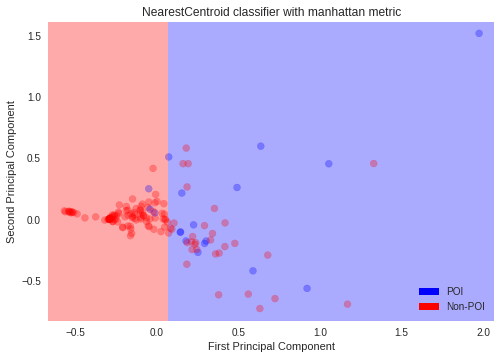

In [44]:
h = .02  #step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

scale = MaxAbsScaler()
X_trans = scale.fit_transform(X)
pca = PCA(copy=True,
          iterated_power='auto',
          n_components=2,
          random_state=42,
          svd_solver='auto',
          tol=0.0,
          whiten=False)
X_trans = pca.fit_transform(X_trans)
y_trans = y.values

clf = NearestCentroid(metric='manhattan', shrink_threshold=None)
clf.fit(X_trans, y_trans)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_trans[:, 0].min() - 0.1, X_trans[:, 0].max() + 0.1
y_min, y_max = X_trans[:, 1].min() - 0.1, X_trans[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y_trans, cmap=cmap_bold, alpha=0.3)

# Legend Data
classes = ['POI','Non-POI']
class_colours = ['#0000FF', '#FF0000']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))

# Plot Legend ('loc' == position):
plt.legend(recs,classes,loc=4)

plt.title("NearestCentroid classifier with manhattan metric")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

plt.show()

Nearest Centroid Classifier achieved an even better f1 score (0.44) with an average Precision and an excellent Recall.

## Algorithm Tuning

Nearest Centroid Classifier is a very fast algorithm and additionally it accepts too few arguments, as a result we were able to try all the different combination during the evaluation.  
We can conclude that the best classification of the employees to POIs can be achieved with the following steps:  

|Step             |Algorithm(attributes)                                                                                           |
|:---------------:|:--------------------------------------------------------------------------------------------------------------:|
|Scaling          |MaxAbsScaler(copy=True)                                                                                         |
|Feature Selection|PCA(copy=True, iterated_power='auto', n_components=2, random_state=42, svd_solver='auto', tol=0.0, whiten=False)|
|Classification   |NearestCentroid(metric='manhattan', shrink_threshold=None)                                                      |

# Project Closure

## Dumping files

In [45]:
pickle.dump(data_df.to_dict(orient='index'), open("my_dataset.pkl", "wb"))
pickle.dump(my_classifier, open("my_classifier.pkl", "wb"))
pickle.dump(features, open("my_feature_list.pkl", "wb"))

# Future Improvements

There are at least two improvements I could have done to the Project.  

The first one is a tweak in the classification algorithm.  
We noticed in the scatterplot between Total Stock Value vs Total Payments, that none of the persons who had zero Salary or zero Stocks was a POI.

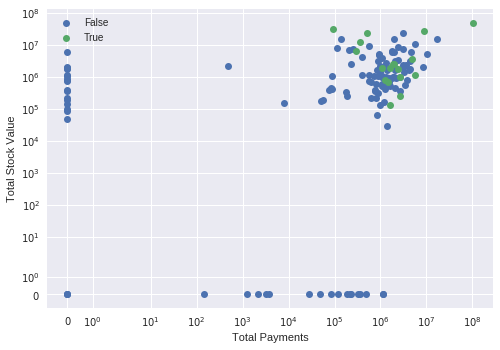

In [46]:
fig1

Actually, this is so sensible that we could say that it is always true and thus create a rule out of this. If you consider that the persons fall under this category are {{146-81}} out of 146, we could improve the performance of our classification up to:

In [47]:
((65*1)+(81*0.44))/(65+81)

0.6893150684931507

(*of course this score isn't exact because the algorithm selection and evaluation process should be followed again with the dataset without the zero Payments / Stocks employees*)

So, I'm leaving for a future improvement the creation of a custom classifier that would classify as non-POI every employee with zero Payments or Stocks and by using a machine learning algorithm for the rest.
***
The second one is the usage of the content of the emails on the classification. Currently, I just used aggregated values from email headers in the form of the "emails features. Using NLP to dig into the actual content of the emails and vectorize them, may improve the classification further.